In [1]:
import seaborn
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-2220 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1442018433.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 329874 observations with 31301 users and 109 items.
PROGRESS:     Data prepared in: 0.184737s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 2        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations           

In [3]:
athlete_ratings, segment_ratings, model = cm.df_to_latent_features(df, 4)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 329874 observations with 31301 users and 109 items.
PROGRESS:     Data prepared in: 0.165196s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 4        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations           

In [4]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,rating_1,rating_2,rating_3,rating_4
seg_average_grade,0.627337,-0.280071,0.032950,0.474983
seg_distance,0.243526,-0.061501,-0.094919,0.019717
seg_maximum_grade,0.093761,-0.095484,0.005647,0.151383
rating_1,1.000000,0.036197,0.085669,0.073196
rating_2,0.036197,1.000000,0.034446,-0.096055
rating_3,0.085669,0.034446,1.000000,-0.370949
rating_4,0.073196,-0.096055,-0.370949,1.000000


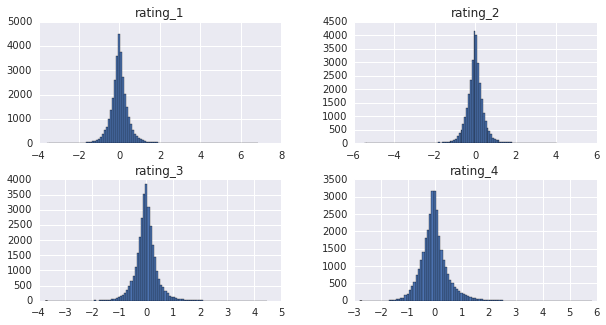

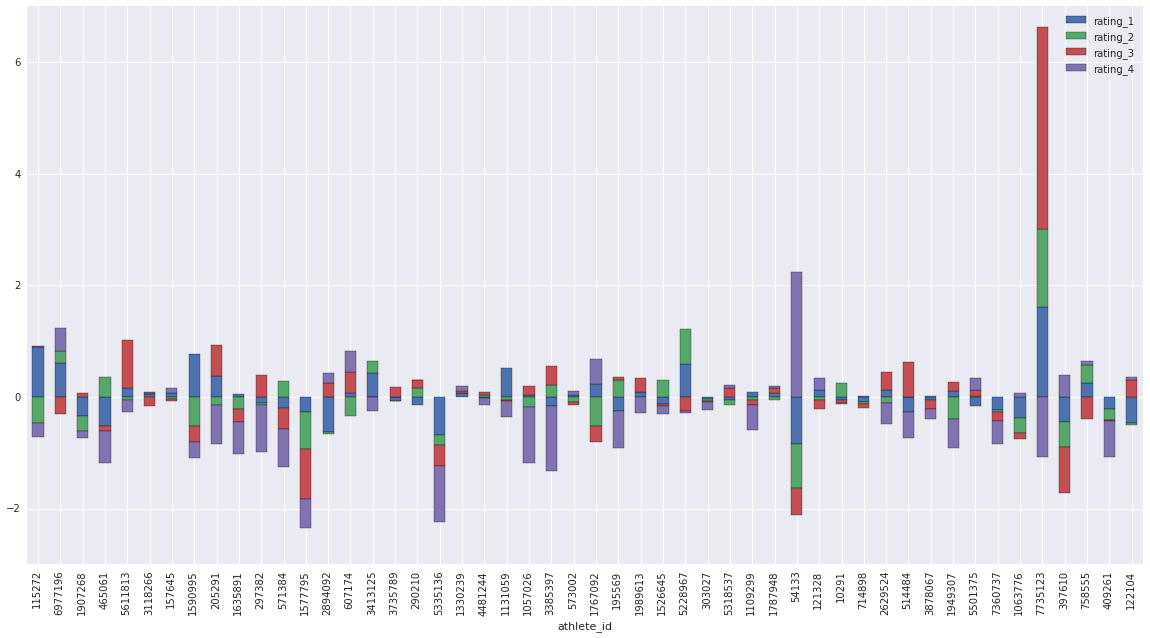

In [5]:
vm.plot_ratings(athlete_ratings)

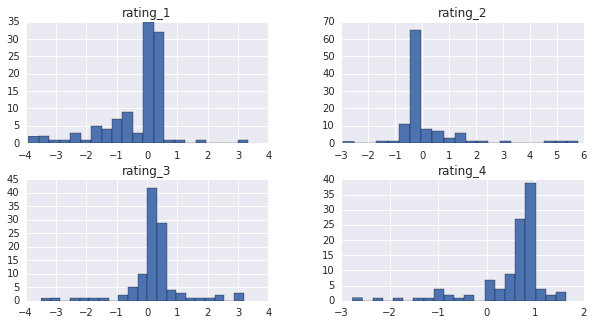

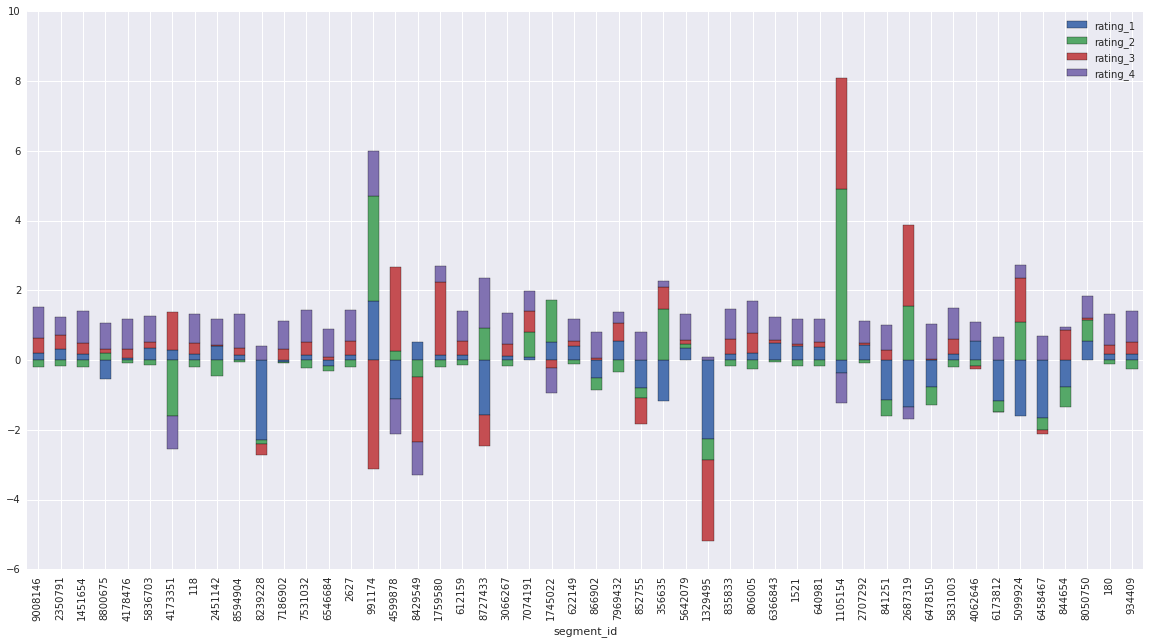

In [6]:
vm.plot_ratings(segment_ratings)

In [26]:
test_sf = gl.SFrame(testing_df[['athlete_id', 'segment_id', 'average_speed']])
testing_df.shape

(53032, 18)

In [33]:
predictions = np.array(model.predict(test_sf))
predictions.shape

(53032,)

In [34]:
rmse = (((testing_df.average_speed.values - predictions) ** 2) ** 0.5).sum() / predictions.shape[0]

In [35]:
rmse

0.56226741622784138